In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import random
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, cross_validation
from sklearn.model_selection import cross_val_score 
from sklearn.utils import shuffle

/Users/amandabrown/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#filename = "../data/loan.csv"
filename = "../data/accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filename)

/Users/amandabrown/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(2260701, 151)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [5]:
df.columns[df.columns.str.contains('fico')]

Index(['fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'sec_app_fico_range_low',
       'sec_app_fico_range_high'],
      dtype='object')

In [6]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

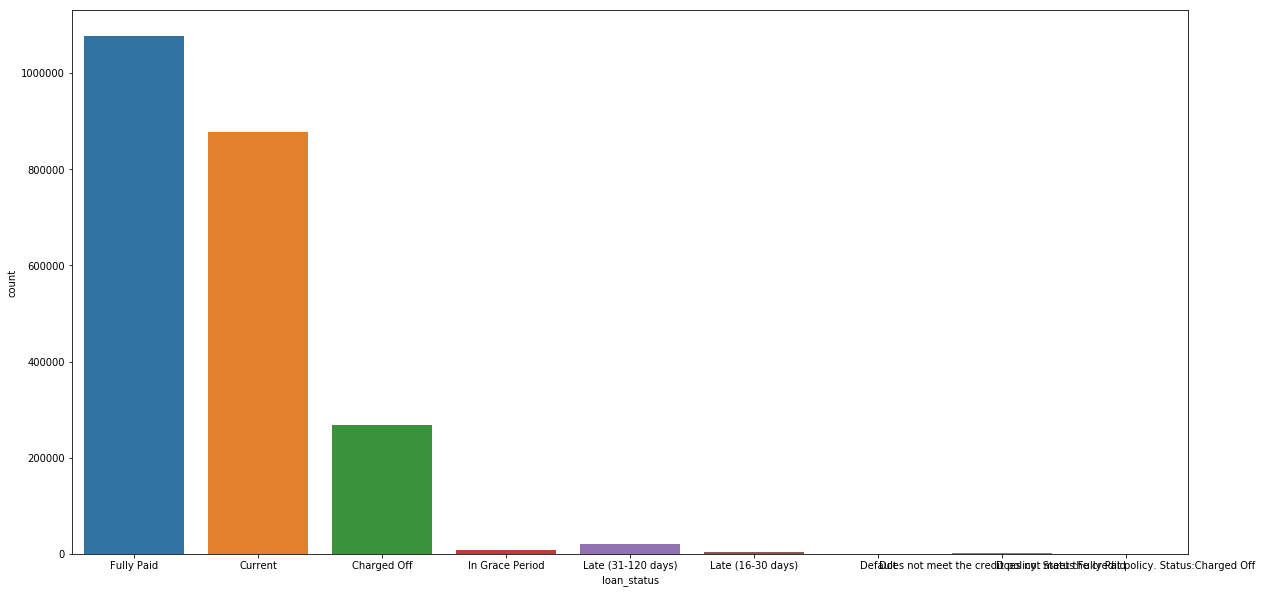

In [7]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x="loan_status", data=df)

In [8]:
df = df.loc[df['loan_status'].isin(['Default', 'Fully Paid', 'Charged Off'])]

In [9]:
df.shape

(1345350, 151)

In [10]:
cols = ['funded_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_title' ,
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
        'purpose', 'title', 'zip_code', 'addr_state','fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'dti' ,'delinq_2yrs',
        'earliest_cr_line','loan_status']

In [11]:
df[cols].head(10)

,funded_amnt,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,zip_code,addr_state,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,dti,delinq_2yrs,earliest_cr_line,loan_status
0,3600.0,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,...,190xx,PA,675.0,679.0,564.0,560.0,5.91,0.0,Aug-2003,Fully Paid
1,24700.0,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,small_business,...,577xx,SD,715.0,719.0,699.0,695.0,16.06,1.0,Dec-1999,Fully Paid
2,20000.0,10.78,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,...,605xx,IL,695.0,699.0,704.0,700.0,10.78,0.0,Aug-2000,Fully Paid
4,10400.0,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,...,174xx,PA,695.0,699.0,704.0,700.0,25.37,1.0,Jun-1998,Fully Paid
5,11950.0,13.44,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,debt_consolidation,...,300xx,GA,690.0,694.0,759.0,755.0,10.20,0.0,Oct-1987,Fully Paid
6,20000.0,9.17,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,debt_consolidation,...,550xx,MN,680.0,684.0,654.0,650.0,14.67,0.0,Jun-1990,Fully Paid
7,20000.0,8.49,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,major_purchase,...,293xx,SC,705.0,709.0,674.0,670.0,17.61,1.0,Feb-1999,Fully Paid
8,10000.0,6.49,A,A2,SERVICE MANAGER,6 years,RENT,85000.0,Not Verified,credit_card,...,160xx,PA,685.0,689.0,719.0,715.0,13.07,0.0,Apr-2002,Fully Paid
9,8000.0,11.48,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.0,Not Verified,credit_card,...,029xx,RI,700.0,704.0,679.0,675.0,34.80,0.0,Nov-1994,Fully Paid
12,1400.0,12.88,C,C2,Logistics Manager,3 years,MORTGAGE,64000.0,Not Verified,other,...,275xx,NC,700.0,704.0,704.0,700.0,34.95,0.0,Jun-1996,Fully Paid


In [12]:
df['emp_length'].value_counts()

10+ years    442209
2 years      121751
< 1 year     108065
3 years      107602
1 year        88495
5 years       84154
4 years       80558
6 years       62735
8 years       60704
7 years       59624
9 years       50937
Name: emp_length, dtype: int64

In [13]:
mymap = {'< 1 year': 0, '1 year': 1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9, '10 years':10,'10+ years':11}

df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [14]:
mymap = {'Default': 1, 'Charged Off': 1,'Fully Paid':0}

df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
df['loan_status'].head(10)

0     0
1     0
2     0
4     0
5     0
6     0
7     0
8     0
9     0
12    0
Name: loan_status, dtype: int64

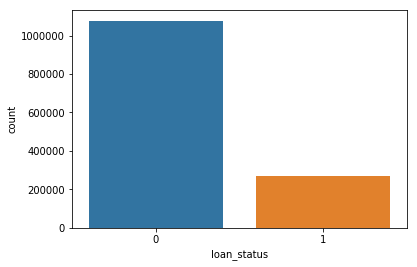

In [16]:
df['loan_status'].value_counts()
sns.countplot(x="loan_status", data=df)

B    392748
C    381694
A    235095
D    200966
E     93656
F     32059
G      9132
Name: grade, dtype: int64


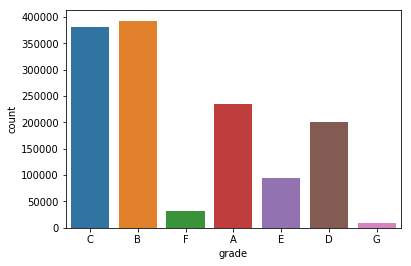

In [17]:
print(df['grade'].value_counts())
sns.countplot(x="grade", data=df)

In [ ]:
# one hot encode


In [18]:
df_train = df.sample(frac=0.8,random_state=1)
df_test = df.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)

(1076280, 151)
(269070, 151)


In [88]:
df_train.shape

(1076280, 151)

In [92]:
cols

['funded_amnt',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'loan_status']

In [91]:
df_train[cols].dtypes

funded_amnt             float64
int_rate                float64
grade                    object
sub_grade                object
emp_title                object
emp_length              float64
home_ownership           object
annual_inc              float64
verification_status      object
purpose                  object
title                    object
zip_code                 object
addr_state               object
fico_range_low          float64
fico_range_high         float64
last_fico_range_high    float64
last_fico_range_low     float64
dti                     float64
delinq_2yrs             float64
earliest_cr_line         object
loan_status               int64
dtype: object

Text(20, -15, 'Correlation Between Covariates')

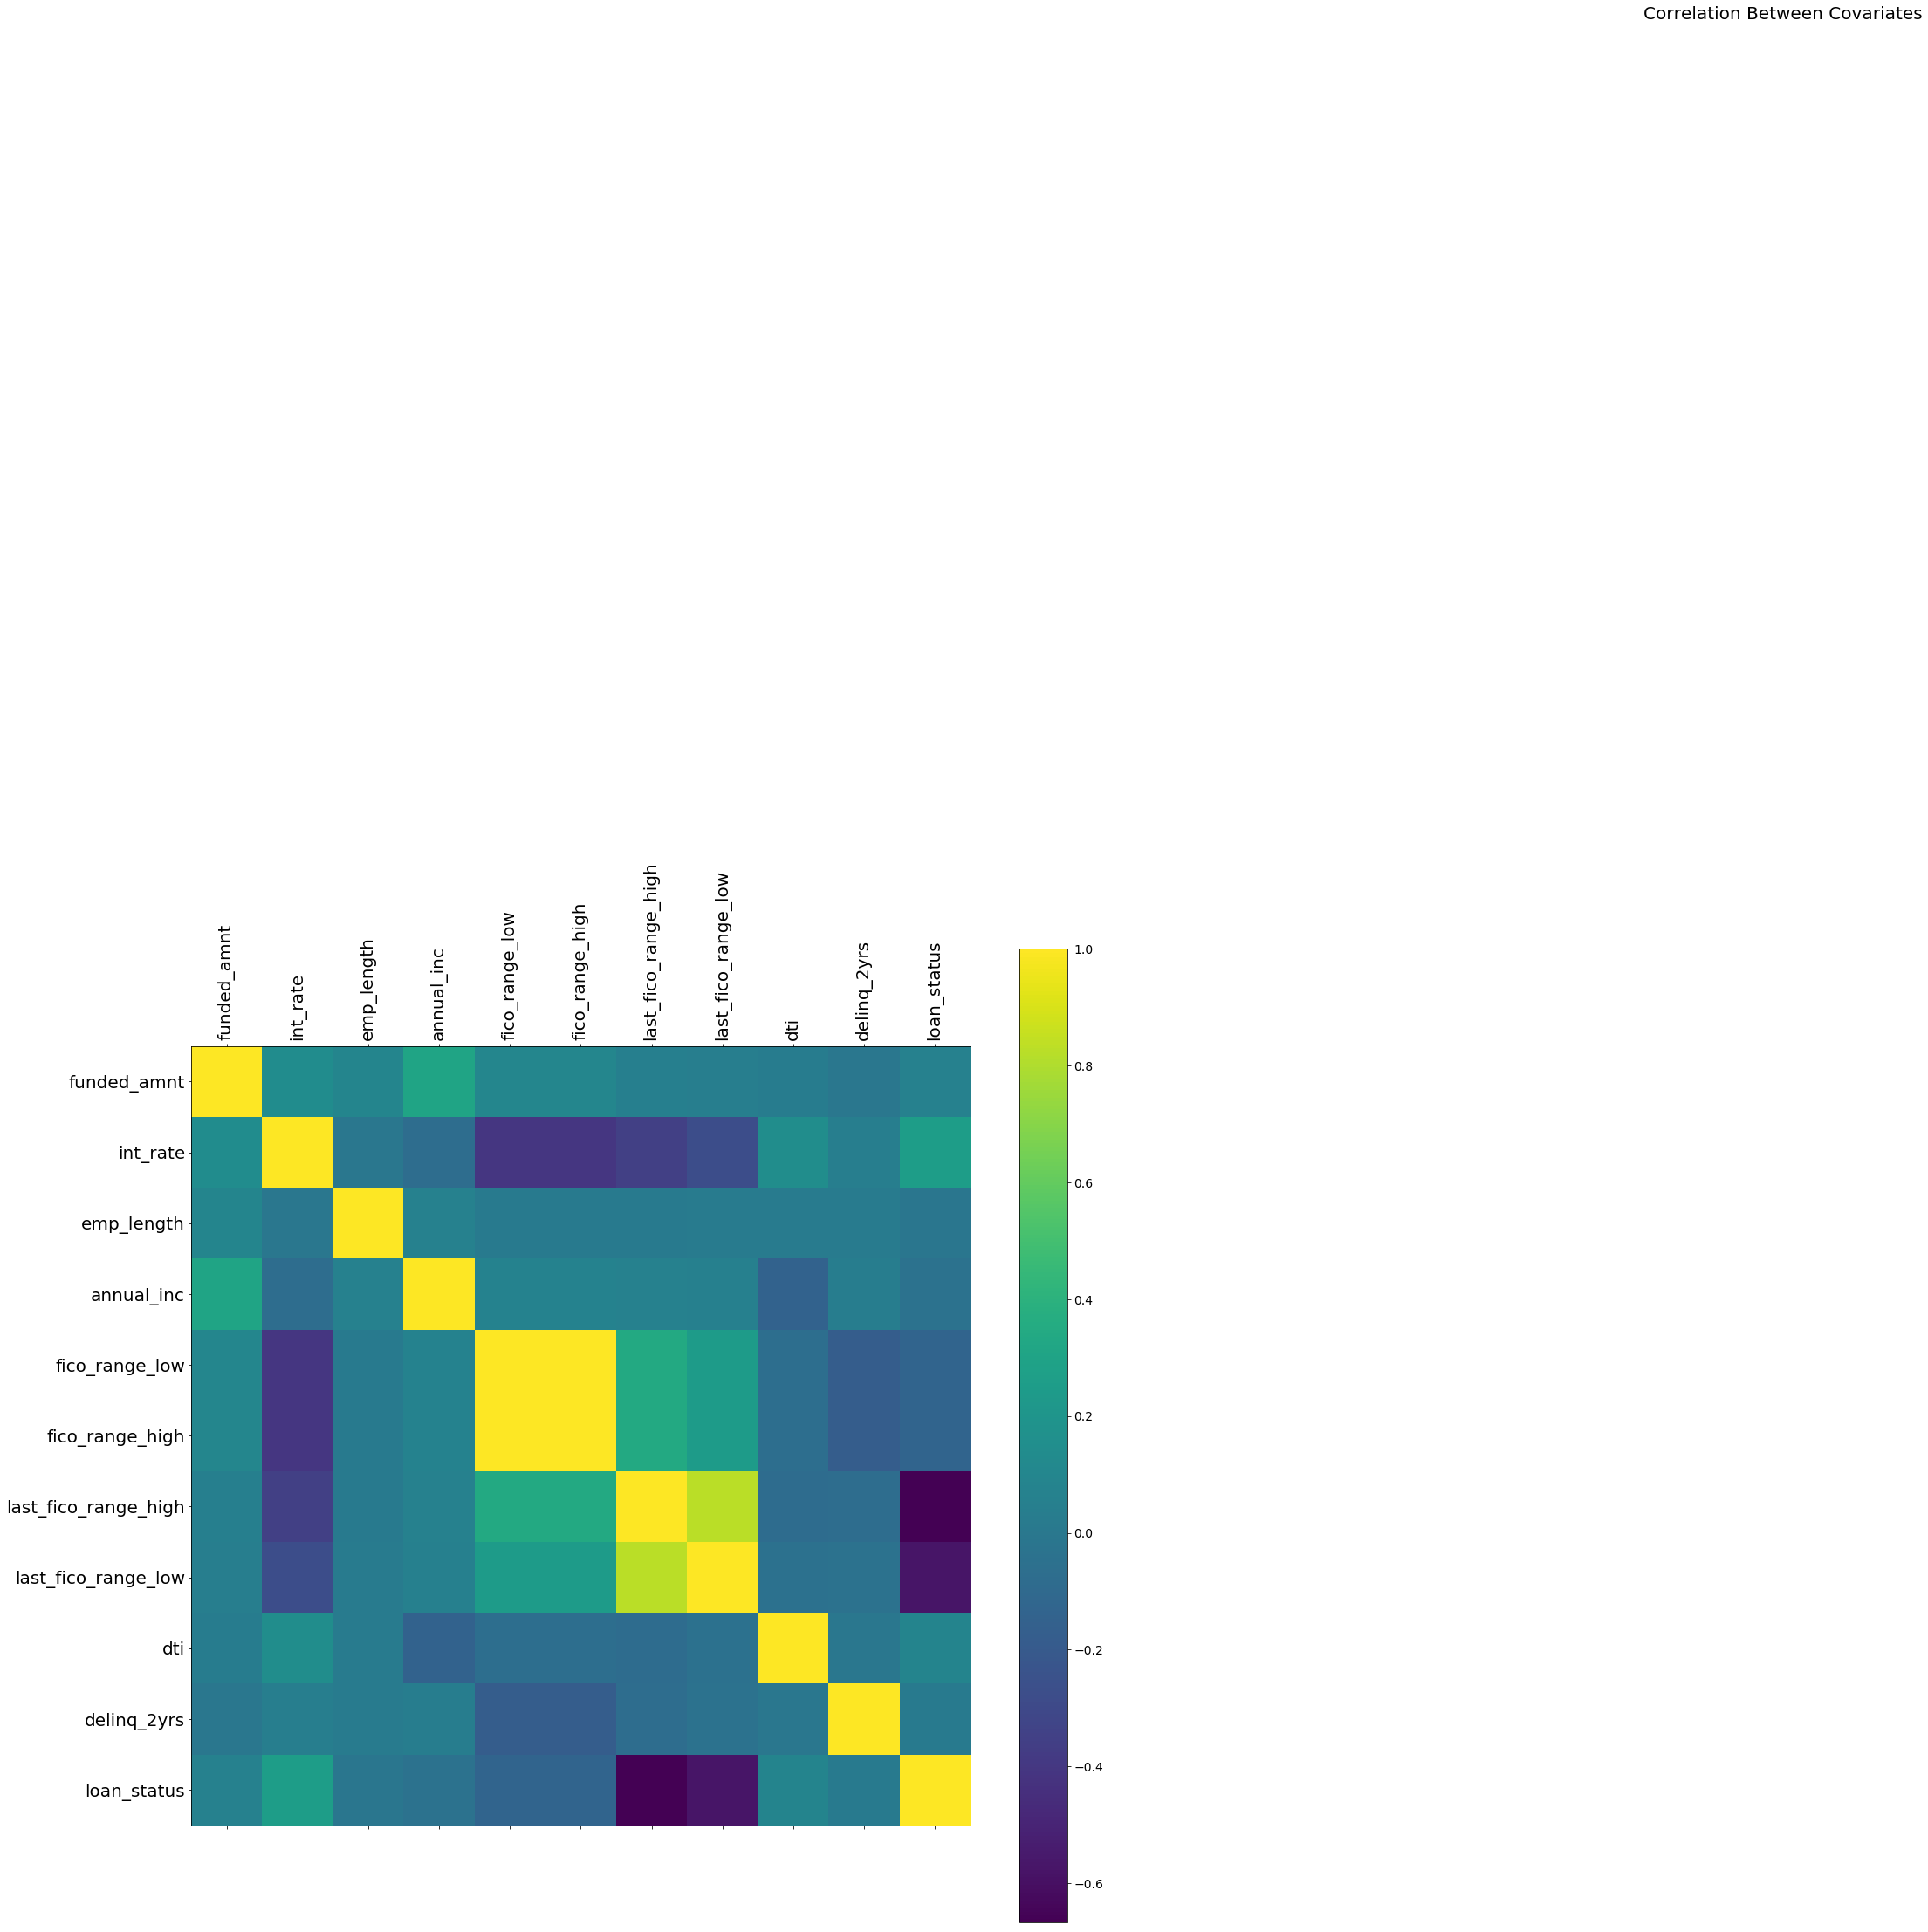

In [26]:
f = plt.figure(figsize=(20, 20))
cor = df_train[cols].corr()
plt.matshow(cor, fignum=f.number)
plt.xticks(range(cor.shape[1]), cor.columns, fontsize=20, rotation=90)
plt.yticks(range(cor.shape[1]), cor.columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.text(20, -15, 'Correlation Between Covariates',fontsize=20)

In [80]:
cor

,funded_amnt,int_rate,emp_length,annual_inc,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,dti,delinq_2yrs,loan_status
funded_amnt,1.000000,0.141893,0.090429,0.308825,0.100273,0.100272,0.050442,0.045929,0.032920,-0.003137,0.066338
int_rate,0.141893,1.000000,-0.004944,-0.072181,-0.404812,-0.404809,-0.349116,-0.271934,0.147620,0.048601,0.258557
emp_length,0.090429,-0.004944,1.000000,0.066550,0.018416,0.018417,0.020139,0.025461,0.027250,0.022987,-0.014630
annual_inc,0.308825,-0.072181,0.066550,1.000000,0.071232,0.071232,0.067647,0.061011,-0.139940,0.039222,-0.041264
fico_range_low,0.100273,-0.404812,0.018416,0.071232,1.000000,1.000000,0.344609,0.247186,-0.063013,-0.174261,-0.130411
fico_range_high,0.100272,-0.404809,0.018417,0.071232,1.000000,1.000000,0.344609,0.247186,-0.063015,-0.174259,-0.130410
last_fico_range_high,0.050442,-0.349116,0.020139,0.067647,0.344609,0.344609,1.000000,0.829817,-0.076326,-0.073979,-0.667444
last_fico_range_low,0.045929,-0.271934,0.025461,0.061011,0.247186,0.247186,0.829817,1.000000,-0.047330,-0.036923,-0.575764
dti,0.032920,0.147620,0.027250,-0.139940,-0.063013,-0.063015,-0.076326,-0.047330,1.000000,-0.007475,0.085058
delinq_2yrs,-0.003137,0.048601,0.022987,0.039222,-0.174261,-0.174259,-0.073979,-0.036923,-0.007475,1.000000,0.020406


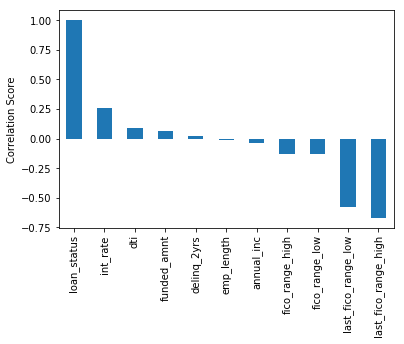

In [81]:
sorted_cor = cor.sort_values(by=['loan_status'],ascending= False)
sorted_cor = sorted_cor['loan_status'].plot(kind='bar')
plt.ylabel("Correlation Score")
sorted_cor

emp_title         0.063820
emp_length        0.058392
title             0.012379
dti               0.000280
purpose           0.000000
int_rate          0.000000
grade             0.000000
sub_grade         0.000000
home_ownership    0.000000
annual_inc        0.000000
dtype: float64


Text(0, 0.5, 'Number of Entries')

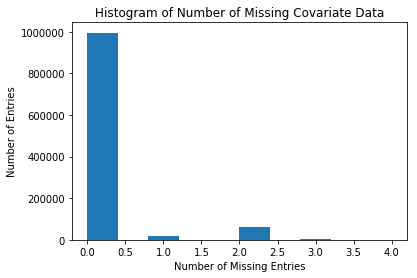

In [33]:
 # Number of missing data values (NaN)
totNA = df_train[cols].isnull().sum().sum() # in total 
colNA = df_train[cols].isnull().sum(axis=0) # by column 
rowNA = df_train[cols].isnull().sum(axis=1) # by row
missing_rate = colNA/df_train[cols].shape[0]
top_missing = missing_rate.sort_values(ascending=False)[0:10] 
print(top_missing) # by column
missing_rate = rowNA
top_missing = rowNA.sort_values(ascending=False)[0:10]
top_missing # by row
plt.hist(rowNA)
plt.title("Histogram of Number of Missing Covariate Data") 
plt.xlabel("Number of Missing Entries") 
plt.ylabel("Number of Entries")

In [93]:
#Create design matrix
df_train = df_train.dropna()
Y_tr = df_train[['loan_status']]
Y_te = df_test[['loan_status']]
X_tr = df_train[cols]
X_te = df_test[cols]

In [94]:
print(Y_tr.shape, X_tr.shape)
print(Y_te.shape, X_te.shape)

(0, 1) (0, 21)
(269070, 1) (269070, 21)


In [66]:
float_cols = (X_tr.dtypes == np.float64)
cols[float_cols].index

Index(['funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'fico_range_low',
       'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 'dti',
       'delinq_2yrs'],
      dtype='object')

/Users/amandabrown/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/amandabrown/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


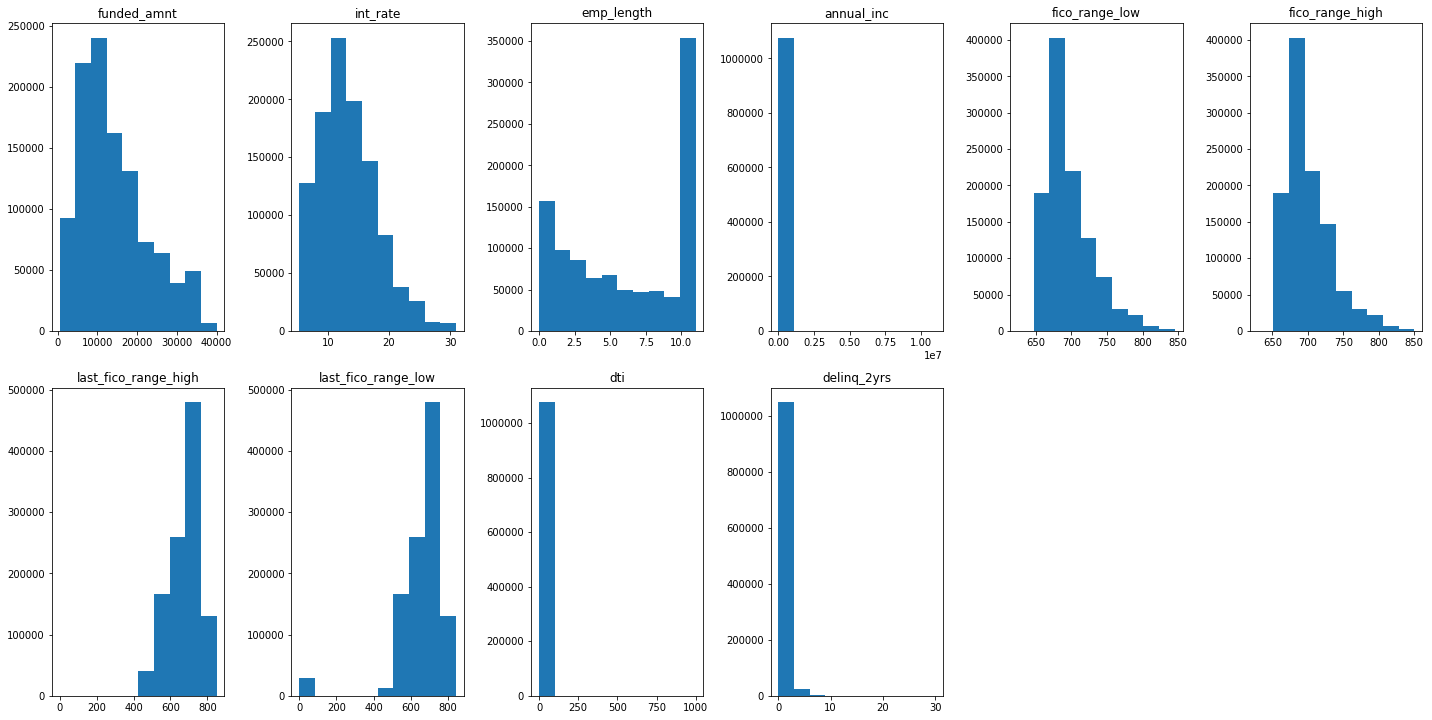

In [67]:
#Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,20), facecolor='white')
# plot numbering starts at 1, not 0
plot_number = 1
float_cols = (X_tr.dtypes == np.float64)

for i in cols[float_cols].index:
    ax = plt.subplot(4,6, plot_number) 
    plt.hist(X_tr[i]) 
    ax.set_title(i)
    # Go to the next plot for the next loop 
    plot_number = plot_number + 1
plt.tight_layout()

Need to log-transform DTI and annual income... maybe also funded amt, int_rate

Shuffle the data

In [68]:
X_tr, Y_tr = shuffle(X_tr,Y_tr,random_state=0)

In [74]:
np.any(np.isnan(X_tr))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Apply a standard scaler

In [76]:
X_tr_tfm = X_tr[cols[float_cols].index]
print(np.any(np.isnan(X_tr_tfm)))
sc = StandardScaler()
X_tr_tfm = sc.fit_transform(X_tr_tfm)
X_tr_tfm = pd.DataFrame(X_tr_tfm)

True


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
fm1 = LinearRegression().fit(X_tr, Y_tr)

ValueError: could not convert string to float: 'D'

In [ ]:
fm2 = Lasso(alpha=0.1).fit(X_tr_tfm, Y_tr)
fm3 = Lasso(alpha=1).fit(X_tr_tfm, Y_tr)
fm4 = Lasso(alpha=10).fit(X_tr_tfm, Y_tr)
fm5 = Lasso(alpha=100).fit(X_tr_tfm, Y_tr)

In [ ]:
z = np.vstack((fm4.coef_,X_tr.columns))
coefs = pd.DataFrame({'Coefficients': fm4.coef_, 'Covariates': X_tr.columns}, columns=['Coefficients', 'Covariates'])
coefs.set_index("Covariates", inplace = True)

In [ ]:
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.scatter(coefs.index , coefs['Coefficients'])
plt.xticks(rotation=90)
plt.ylabel("Coefficient")
plt.show()

- before running the baseline, pick which columns we want to use (pick the maximal set)
- figure out what category buckets will be
- one hot encoding
- 